# Описание набора данных.
Представленный набор данных в формате .csv получен от служб доставки еды с некторых ресторанов. В данном наборе содержится такая информация о заказах, как:

1. ID *- идентификационный номер заказа*
2. Delivery_person_ID *- идентификационный номер доставщика*
3. Delivery_person_Age *- возраст доставщика*
4. Delivery_person_Ratings *- рейтинг доставщика*
5. distance_meters *- растояние (м) от ресторана до заказчика*
6. order_Drinks	*- тип заказываемых продуктов: Напитки*
7. order_Meal	*- тип заказываемых продуктов: Еда*
8. order_Snack *- тип заказываемых продуктов: Закуски*
9. vehicle_electric_scooter	*- транспорт доставщика: электроскутер*
10. vehicle_motorcycle *- транспорт доставщика: мотоцикл*
11. vehicle_scooter	*- транспорт доставщика: скутер*
12. Time_taken_min *- время доставки*

**Задача состоит в том, чтобы по информации о заказе предсказать время его доставки** в минутах. Качественное решение данной задачи позволит службам доставки лучше прогнозировать свою нагрузку, подбирать курьеров для заказов и точнее уведомлять клиентов об ориентировочном времени доставки.

# 1. Подготовка и первичный анализ данных

Импорт библиотек

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Создаем датафрейм с данными о заказах

In [17]:
df = pd.read_csv("delivery-time.csv") #Проверить путь!
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
0,4607,INDORES13DEL02,37,4.9,3025.149286,0,0,1,0,1,0,24
1,B379,BANGRES18DEL02,34,4.5,20183.529729,0,0,1,0,0,1,33
2,5D6D,BANGRES19DEL01,23,4.4,1552.757802,1,0,0,0,1,0,26
3,7A6A,COIMBRES13DEL02,38,4.7,7790.401360,0,0,0,0,1,0,21
4,70A2,CHENRES12DEL01,32,4.6,6210.137966,0,0,1,0,0,1,30


Выводим информацию по датафрейму. Проверяем на наличие пропущенных значений

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45593 non-null  object 
 1   Delivery_person_ID        45593 non-null  object 
 2   Delivery_person_Age       45593 non-null  int64  
 3   Delivery_person_Ratings   45593 non-null  float64
 4   distance_meters           45593 non-null  float64
 5   order_Drinks              45593 non-null  int64  
 6   order_Meal                45593 non-null  int64  
 7   order_Snack               45593 non-null  int64  
 8   vehicle_electric_scooter  45593 non-null  int64  
 9   vehicle_motorcycle        45593 non-null  int64  
 10  vehicle_scooter           45593 non-null  int64  
 11  Time_taken_min            45593 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


Избавляемся от признаков ID и Delivery_person_ID. Удаляем соответствующие колонки из набора данных.

In [19]:
df = df.drop(['ID', 'Delivery_person_ID'], axis=1)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
0,37,4.9,3025.149286,0,0,1,0,1,0,24
1,34,4.5,20183.529729,0,0,1,0,0,1,33
2,23,4.4,1552.757802,1,0,0,0,1,0,26
3,38,4.7,7790.401360,0,0,0,0,1,0,21
4,32,4.6,6210.137966,0,0,1,0,0,1,30


Определяем количество оставшихся признаков.

In [20]:
len(df.columns)

10

Некоторые заказы могли быть сделаны с ошибкой, например из-за того, что клиент забыл выключить VPN. Избавляемся от некоторых таких заказов.

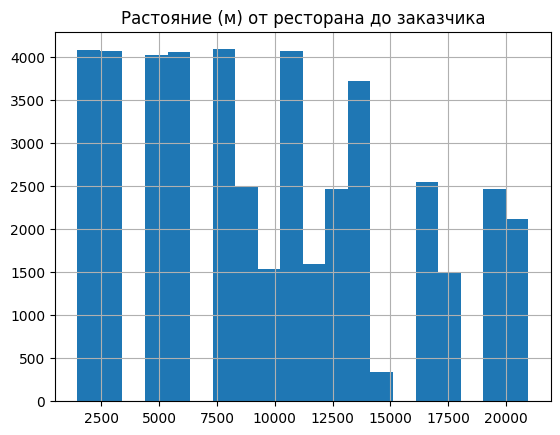

In [24]:
df['distance_meters'].hist(bins=20)
plt.title('Растояние (м) от ресторана до заказчика')
plt.show()

Уберем из рассмотрения заказы, у которых в колонке distance_meters значение более 25 км.

In [22]:
df = df[df['distance_meters']<=25000]


Проверим размер полученного набора данных, т.е. кол-во заказов с расстоянием доставки меньше 100 км

In [23]:
df.shape[0]

45162

Определим максимальное расстояние доставки после удаления выбросов

In [25]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
count,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000
mean,29.540012,4.632691,9735.396236,0.248550,0.250919,0.253045,0.083034,0.580931,0.334905,26.298038
std,5.692706,0.322902,5608.507582,0.432177,0.433547,0.434761,0.275937,0.493412,0.471963,9.383733
min,15.000000,1.000000,1465.067405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,4663.411525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,29.000000,4.700000,9220.209378,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,34.000000,4.800000,13681.490406,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,32.000000
max,50.000000,6.000000,20969.489380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000


In [26]:
df['distance_meters'].max()

20969.489380087085

# 2. Построение базовой модели регрессии

## Первое приближение


Построим базовую модель линейной регрессии и попытаемся предсказать время доставки заказов только по информации о доставщике и расстоянию от ресторана до клиента. Здесь мы не будем смотреть на состав заказа и тип транспортного средства.

Отберем из набора данных только признаки Delivery_person_Age, Delivery_person_Ratings, distance_meters и целевой признак Time_taken_min. При помощи train_test_split разобьем набор данных на обучающую (train) и тестовую (test) выборки с параметрами test_size=0.2 (20% на тестовую выборку), random_state=15.

In [36]:
t_s=0.2 #тестовая выборка 20%
r_s=15 #начальное состояние генератора случайных чисел для воспроизводимости

In [37]:
from sklearn.model_selection import train_test_split

y = df["Time_taken_min"]
X = df.drop(columns=["Time_taken_min","order_Drinks","order_Meal","order_Snack",
             "vehicle_electric_scooter","vehicle_motorcycle","vehicle_scooter"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_s, random_state=r_s)

Посмотрим какой средний возраст доставщиков в тренировочной выборке.

Вычислим выборочное среднее колонки Delivery_person_Age тренировочного набора данных.

In [38]:
X_train['Delivery_person_Age'].mean()

np.float64(29.55503888842758)

Далее перейдем к построению первой модели и её оценке.

Обучим модель линейной регрессии LinearRegression() с параметрами по умолчанию на тренировочных данных. Оценим на тестовых данных.

Вычислим среднюю абсолютную ошибку mean_absolute_error() для тестового набора данных.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

6.430275246196993

Научились предсказывать время доставки с погрешностью 6 мин 26 сек. Среднее время доставки - 26 мин 17 сек

## Масштабирование признаков

Теперь попробуем добавить информацию о составе заказа и типе транспортного средства, а также сделать такую предобработку данных, как масштабирование нецелевых признаков. Ведь такое преобразование часто полезно для модели линейной регрессии.

Вернем в рассмотрение все признаки, кроме ID и Delivery_person_ID. Обучим преобразование MinMaxScaler() на тренировочном наборе данных и применим его для тренировочных и тестовых данных.

In [41]:
from sklearn.preprocessing import MinMaxScaler

y = df["Time_taken_min"]
X = df.drop(columns=["Time_taken_min"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_s)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter
31041,0.314286,0.72,0.945951,0.0,0.0,0.0,0.0,1.0,0.0
12428,0.342857,0.70,0.084281,0.0,1.0,0.0,0.0,1.0,0.0
31128,0.571429,0.64,0.164537,0.0,0.0,0.0,0.0,1.0,0.0
35010,0.400000,0.72,0.777792,0.0,0.0,0.0,0.0,1.0,0.0
3946,0.685714,0.78,0.084657,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
35822,0.514286,0.76,0.247383,0.0,0.0,1.0,0.0,1.0,0.0
39674,0.628571,0.80,0.800283,1.0,0.0,0.0,0.0,0.0,1.0
2721,0.228571,0.78,0.234436,0.0,0.0,1.0,0.0,1.0,0.0
8165,0.257143,0.70,0.390184,0.0,1.0,0.0,0.0,1.0,0.0


Посмотрим как изменилось среднее значение в колонке, отвечающей за возраст доставщика. Теперь значение должно быть от 0 до 1.

Вычислим выборочное среднее колонки Delivery_person_Age полученного тренировочного набора данных.

In [42]:
X_train['Delivery_person_Age'].mean()

np.float64(0.41585825395507364)

Повторим обучение и посмотрим изменилось ли качество модели.

Обучим модель LinearRegression() с параметрами по умолчанию на тренировочных данных. Оценим на тестовых данных.

Вычислим mean_absolute_error() для тестового набора данных.

In [43]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

6.3500896030677065

После масштабирования признаков немного уменьшилась погрешность: с 6. 43 мин (00:06:26) до 6.35 мин (00:06:21). Среднее время доставки - 26 мин 17 сек

**Итак, по информации о заказе с определенной точностью мы сможем предсказать время его доставки.** Службы доставки сможет лучше прогнозировать свою нагрузку, подбирать курьеров для заказов и точнее уведомлять клиентов об ориентировочном времени доставки.

# 3. Построение модели классификации

Представим, что ресторан хочет привлечь больше клиентов гарантией быстрой доставки и различными скидками в случае долгой доставки. **Важно заранее научиться классифицировать заказы на те, которые сможем доставить быстро и на более длительные.** Например, быстрой доставкой назовем те, которые занимают не больше 30 минут.

Используя набор данных, полученный на предыдущем шаге, заменим целевой признак Time_taken_min на новый признак is_long_Delivery, значение которого равно 0 для быстрой доставки и 1 в противном случае.

In [ ]:
df['is_long_Delivery'] = df['Time_taken_min'] > 30
df['is_long_Delivery'] = df['is_long_Delivery'].astype(int)
df

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min,is_long_Delivery
0,37,4.9,3025.149286,0,0,1,0,1,0,24,0
1,34,4.5,20183.529729,0,0,1,0,0,1,33,1
2,23,4.4,1552.757802,1,0,0,0,1,0,26,0
3,38,4.7,7790.401360,0,0,0,0,1,0,21,0
4,32,4.6,6210.137966,0,0,1,0,0,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,1489.845884,0,1,0,0,1,0,32,1
45589,21,4.6,11007.734764,0,0,0,0,1,0,36,1
45590,30,4.9,4657.195394,1,0,0,0,0,1,16,0
45591,20,4.7,6232.393050,0,0,1,0,1,0,26,0


Определим долю быстрых доставок.

In [ ]:
1 - df['is_long_Delivery'].mean()

0.7012975510384837

Таким образом, 70% доставок займут меньше получаса



Удаляем признак Time_taken_min. Далее решим задачу классификации, целевым признаком будет is_long_Delivery.

In [ ]:
df = df.drop(["Time_taken_min"], axis=1)

## Метод k-NN (ближайших соседей)

При помощи train_test_split() разбьем набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=15. Также используем стратификацию, т.е. разобьем так, чтобы в тестовой и тренировочной базе была одинаковая доля быстрых доставок. Целевой признак: is_long_Delivery.

In [ ]:
y = df["is_long_Delivery"]
X = df.drop(["is_long_Delivery"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_s, random_state=r_s, stratify=y)

Обучим модель KNeighborsClassifier() с параметрами по умолчанию на тренировочных данных. Оценим на тестовых данных.

Вычислим долю верных предсказаний accuracy_score() для тестового набора данных.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7275545223070962

Точность предсказаний будет ли дотсавка быстрой: 72,8%